In [1]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
#from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
#from __future__ import print_function

In [2]:
#loading the mnist dataset
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
#normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
#generating noise image
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

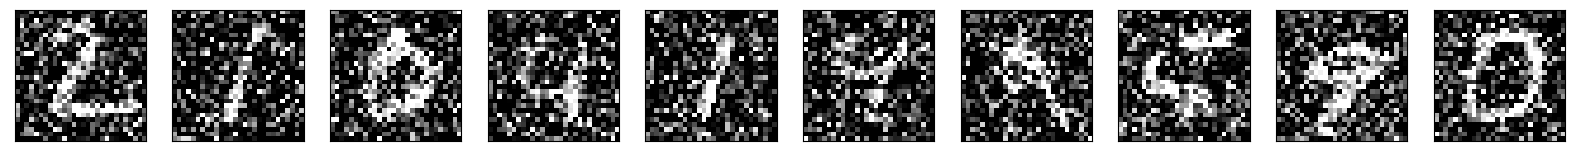

In [5]:

import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
 ax = plt.subplot(1, n, i)
 plt.imshow(x_test_noisy[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
#
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [7]:
#train autoencoder model using adam optimizer
#Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 31s 124ms/step - loss: 0.2084 - val_loss: 0.1287
Epoch 2/20
235/235 [==============================] - 26s 112ms/step - loss: 0.1227 - val_loss: 0.1170
Epoch 3/20
235/235 [==============================] - 29s 121ms/step - loss: 0.1150 - val_loss: 0.1113
Epoch 4/20
235/235 [==============================] - 28s 120ms/step - loss: 0.1109 - val_loss: 0.1104
Epoch 5/20
235/235 [==============================] - 28s 117ms/step - loss: 0.1083 - val_loss: 0.1071
Epoch 6/20
235/235 [==============================] - 29s 122ms/step - loss: 0.1063 - val_loss: 0.1051
Epoch 7/20
235/235 [==============================] - 29s 122ms/step - loss: 0.1049 - val_loss: 0.1032
Epoch 8/20
235/235 [==============================] - 29s 121ms/step - loss: 0.1038 - val_loss: 0.1022
Epoch 9/20
235/235 [==============================] - 29s 123ms/step - loss: 0.1029 - val_loss: 0.1013
Epoch 10/20
235/235 [==============================] - 28s 120ms/step - l

In [9]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)
encoded_imgs[0].shape

313/313 [==============================] - 2s 5ms/step


(28, 28, 1)

In [10]:
decoded_imgs[0].shape

(28, 28, 1)

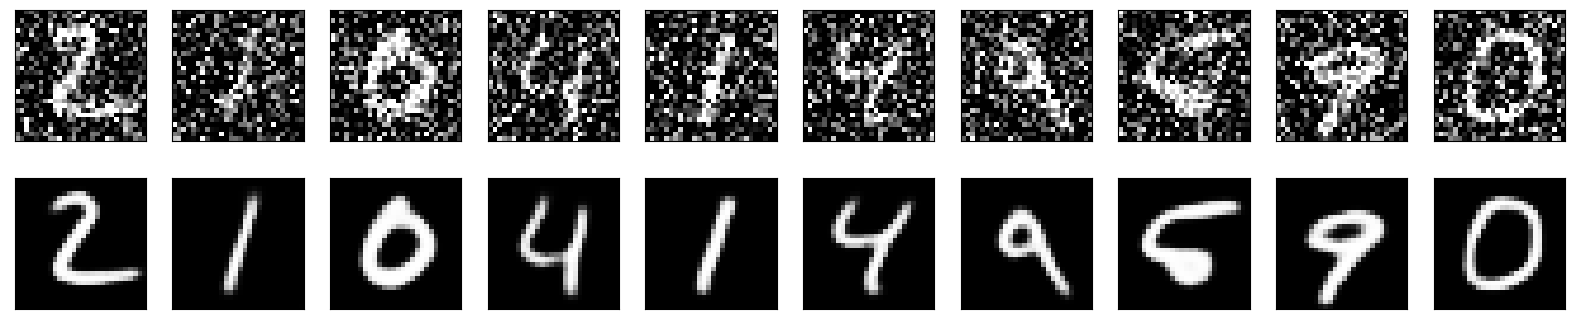

In [11]:
#Visualization for Autoencoder Predictions
# use Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
 # display original
 ax = plt.subplot(2, n, i )
 plt.imshow(x_test_noisy[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# display reconstruction
 ax = plt.subplot(2, n, i + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
'''image_generator = ImageDataGenerator(rescale=1.0 / 255)
train_gen = image_generator.flow_from_directory(
    os.path.join(IMAGES, "training"), 
    class_mode="input", target_size=SHAPE, batch_size=BS,
)
val_gen = image_generator.flow_from_directory(
    os.path.join(IMAGES, "validation"), 
    class_mode="input", target_size=SHAPE, batch_size=BS,
)
hist = autoencoder.fit(train_gen, validation_data=val_gen, epochs=EPOCHS, batch_size=BS)'''

'image_generator = ImageDataGenerator(rescale=1.0 / 255)\ntrain_gen = image_generator.flow_from_directory(\n    os.path.join(IMAGES, "training"), \n    class_mode="input", target_size=SHAPE, batch_size=BS,\n)\nval_gen = image_generator.flow_from_directory(\n    os.path.join(IMAGES, "validation"), \n    class_mode="input", target_size=SHAPE, batch_size=BS,\n)\nhist = autoencoder.fit(train_gen, validation_data=val_gen, epochs=EPOCHS, batch_size=BS)'